In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
from scipy.misc import imread, imsave, imresize
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_files = [join('train',f) for f in listdir('train') if isfile(join('train', f)) and f.endswith('png')]
train_cleaned = [join('train_cleaned',f) for f in listdir('train_cleaned') if isfile(join('train_cleaned', f)) and f.endswith('png')]

In [3]:
trX = []
trY = []
orig_size = []

In [4]:
for fl in train_files:
    img = imread(fl)
    orig_size.append(img.shape)
    img = imresize(img, (200, 300))
    trX.append(img)

In [5]:
trX = np.array(trX)

In [6]:
trX.shape

(144, 200, 300)

In [7]:
trX[0]

array([[231, 231, 228, ..., 232, 233, 233],
       [224, 228, 228, ..., 230, 231, 234],
       [226, 228, 230, ..., 232, 229, 230],
       ..., 
       [224, 222, 219, ..., 226, 223, 222],
       [219, 217, 224, ..., 227, 224, 224],
       [225, 224, 227, ..., 231, 201, 163]], dtype=uint8)

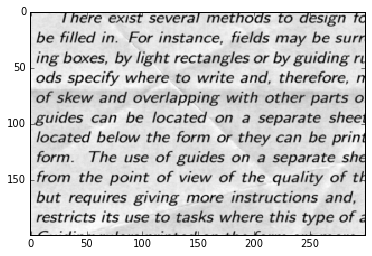

In [8]:
plt.imshow(trX[0], cmap='gray', interpolation='nearest') 

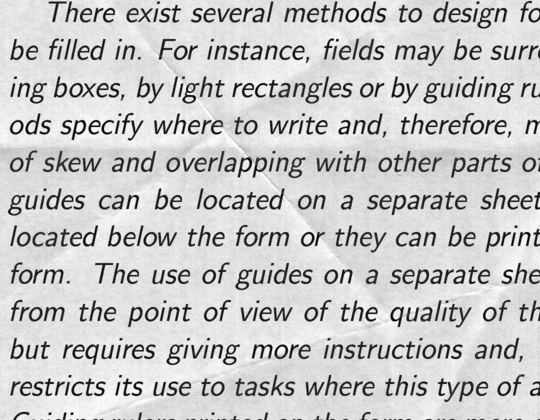

In [9]:
Image(train_files[0])

In [10]:
for fl in train_cleaned:
    img = imread(fl)
    img = imresize(img, (200, 300))
    trY.append(img)

In [11]:
trY = np.array(trY)
trY.shape

(144, 200, 300)

In [12]:
trX = trX.reshape([-1,300*200])/255.0
trY = trY.reshape([-1,300*200])/255.0

In [13]:
from sklearn.cross_validation import train_test_split
X_train, X_val, y_train, y_val = train_test_split(trX, trY, test_size=0.3)

In [14]:
X_train.shape

(100, 60000)

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [24]:
model = Sequential()
model.add(Dense(600, batch_input_shape=(None, 60000),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation='relu'))
model.add(Dense(600,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(60000,activation='sigmoid'))

In [25]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_7 (Dense)                  (None, 600)           36000600    dense_input_3[0][0]              
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 600)           0           dense_7[0][0]                    
____________________________________________________________________________________________________
dense_8 (Dense)                  (None, 100)           60100       dropout_1[0][0]                  
____________________________________________________________________________________________________
dense_9 (Dense)                  (None, 600)           60600       dense_8[0][0]                    
___________________________________________________________________________________________

In [27]:
model.fit(X_train, y_train, nb_epoch=10, batch_size=8)

Epoch 1/10
100/100 [==============================] - 19s - loss: 0.4309 - acc: 0.5032    
Epoch 2/10
100/100 [==============================] - 18s - loss: 0.3452 - acc: 0.5352    
Epoch 3/10
100/100 [==============================] - 20s - loss: 0.3422 - acc: 0.5358    
Epoch 4/10
100/100 [==============================] - 17s - loss: 0.3366 - acc: 0.5360    
Epoch 5/10
100/100 [==============================] - 17s - loss: 0.3367 - acc: 0.5360    
Epoch 6/10
100/100 [==============================] - 19s - loss: 0.3363 - acc: 0.5361    
Epoch 7/10
100/100 [==============================] - 19s - loss: 0.3332 - acc: 0.5362    
Epoch 8/10
100/100 [==============================] - 17s - loss: 0.3237 - acc: 0.5362    
Epoch 9/10
100/100 [==============================] - 17s - loss: 0.3202 - acc: 0.5358    
Epoch 10/10
100/100 [==============================] - 17s - loss: 0.3100 - acc: 0.5361    


In [36]:
model.fit(X_train, y_train, nb_epoch=10, batch_size=8)

Epoch 1/10
100/100 [==============================] - 19s - loss: 0.3176 - acc: 0.5361    
Epoch 2/10
100/100 [==============================] - 18s - loss: 0.3102 - acc: 0.5358    
Epoch 3/10
100/100 [==============================] - 19s - loss: 0.3206 - acc: 0.5353    
Epoch 4/10
100/100 [==============================] - 18s - loss: 0.3127 - acc: 0.5352    
Epoch 5/10
100/100 [==============================] - 17s - loss: 0.3003 - acc: 0.5358    
Epoch 6/10
100/100 [==============================] - 18s - loss: 0.3095 - acc: 0.5359    
Epoch 7/10
100/100 [==============================] - 17s - loss: 0.3028 - acc: 0.5356    
Epoch 8/10
100/100 [==============================] - 19s - loss: 0.3012 - acc: 0.5360    
Epoch 9/10
100/100 [==============================] - 18s - loss: 0.2933 - acc: 0.5359    
Epoch 10/10
100/100 [==============================] - 18s - loss: 0.2852 - acc: 0.5354    


In [28]:
model.evaluate(X_val, y_val, batch_size=16)

44/44 [==============================] - 0s     


[0.3015948777849024, 0.53904168714176526]

In [30]:
y_pred0 = model.predict(X_train[:1])

In [32]:
y_pred0 = y_pred0.reshape([200,300])

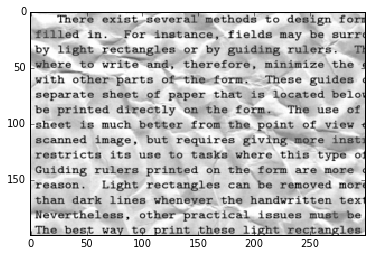

In [34]:
plt.imshow(X_train[0].reshape([200,300])*255.0, cmap='gray', interpolation='nearest') 

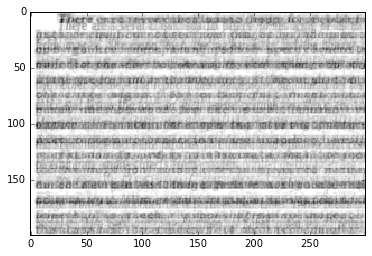

In [35]:
plt.imshow(y_pred0*255.0, cmap='gray', interpolation='nearest') 